In [1]:
# General imports to do graphs and mathematics sequeces

# Data Analysis
import pandas as pd
# Scientific computing
import numpy as np
# Creating static, animated, and interactive visualizations
import matplotlib.pylab as plt
# To do graphics and statical data visualization 
import seaborn as sns

# Used to list all the audios we'll use 
from glob import glob

# Imports to work with audio 
import librosa

# To display the audio that we want to analyze
import librosa.display
import IPython.display as ipd

# #copy pasted code for colors no impact on implementation whatsoever
from itertools import cycle

# Change visual theme of all plots
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# List of all audios about actor 1 in this case
audio_files = glob('./dataset_audio/Actor_01/*.wav')

# Play audio from the list we can do a iterative loop on audio_file
# I only set the first one to test it
ipd.Audio(audio_files[0])

In [3]:
# Load this file to work with this audio, in the future we can do a loop to load 
# every tracks
'''
y : np.ndarray [shape=(n,) or (..., n)]
    y is will be used to draw the graphic in the axis y 
sr : number > 0 [scalar]
    sr is the sample rate to know the length of the audio 
    
'''

y, sr = librosa.load(audio_files[0])

print(f'y: {y[:10]}')
print(f'shape y: {y.shape}') # This is the shape of the track
print(f'sr: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (88289,)
sr: 22050


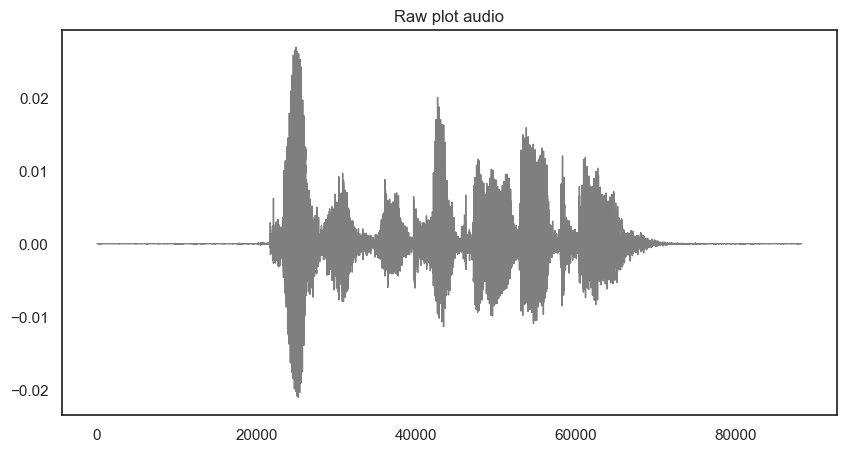

In [4]:
# To paint the plot, we are goint to change numpy array into panda's serie
# Figsize is used to resize the image as we want
pd.Series(y).plot(figsize=(10,5),title='Raw plot audio',lw=1,color=color_pal[7])
plt.show()

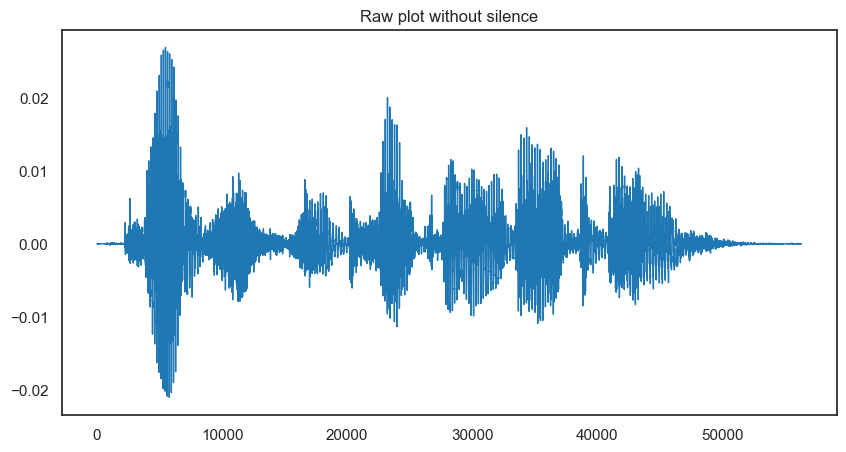

In [5]:
'''In our graph we can see, there is silence at the beginning and 
at the end of the sample, so we use the method trim from librosa 
to remove that silence'''

# we are going to use only the first returned, because the second one only
# gives information about the range without silence
y_trimmed , _ = librosa.effects.trim(y) 

# Plot again without silence
pd.Series(y_trimmed).plot(figsize=(10,5),title='Raw plot without silence',lw=1)
plt.show()

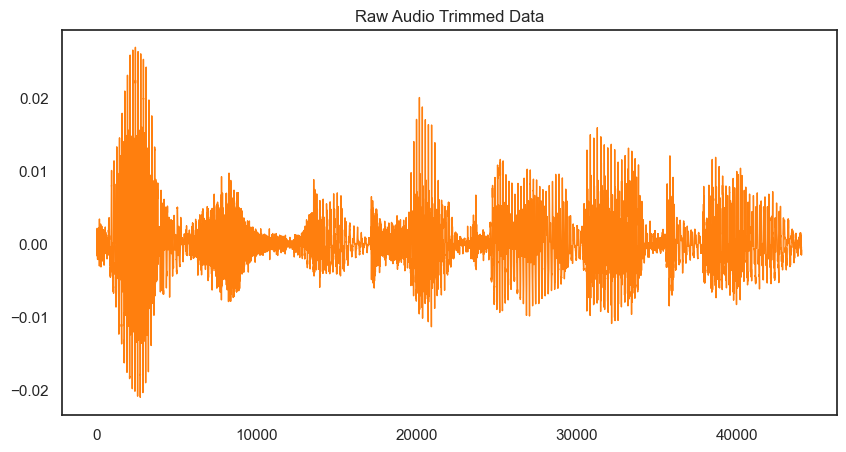

In [6]:
'''We can trim our audio data, in top_db is considered everything lower than that db as silence
it used the same function from librosa, but adding new parameters'''

y_trimmed , _ = librosa.effects.trim(y,top_db=20)

pd.Series(y_trimmed).plot(figsize=(10,5), 
                 lw =1,
                 title = 'Raw Audio Trimmed Data',
                 color = color_pal[1])

plt.show()

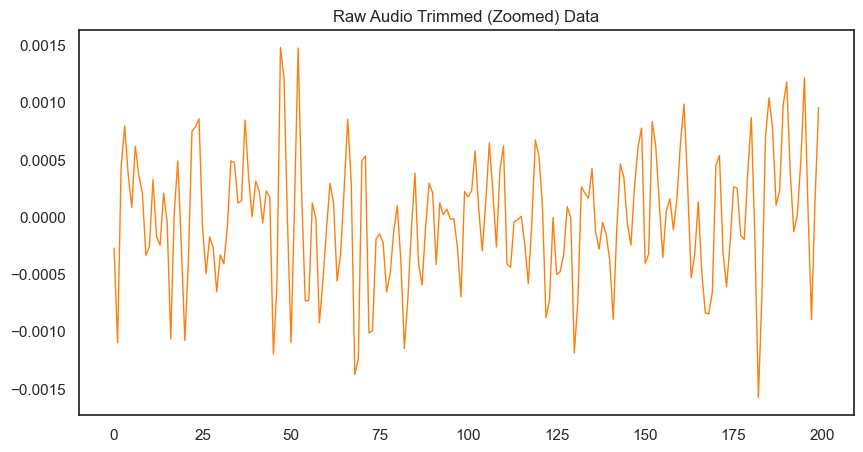

In [7]:
'''Now we are going to do a zoom in a frame of the vector, with this we can see better
the amplitude of the wave'''

# Use the last trimmed var 

pd.Series(y_trimmed[10000:10200]).plot(figsize=(10,5), 
                 lw =1,
                 title = 'Raw Audio Trimmed (Zoomed) Data',
                 color = color_pal[1])

plt.show()

In [8]:
'''Fourier transformation help us to extract which frequency is sounding at different parts of audio.

Now we are going to create a spectogram , using fourier transform. A spectogram is used to have a visual 
repretation about the loudness of a signal. I mean, you can see in which parts of the audio, the wafe has higher
frequency, so if it has more frequency it has more energy '''

D = librosa.stft(y) #Short-time Fourier transform (STFT)
S_db = librosa.amplitude_to_db(np.absolute(D),ref=np.max) #converting D from amplitude to more widely used db(decibels). We use the absolute valor of each elem of D
S_db.shape # look at its shape

(1025, 173)

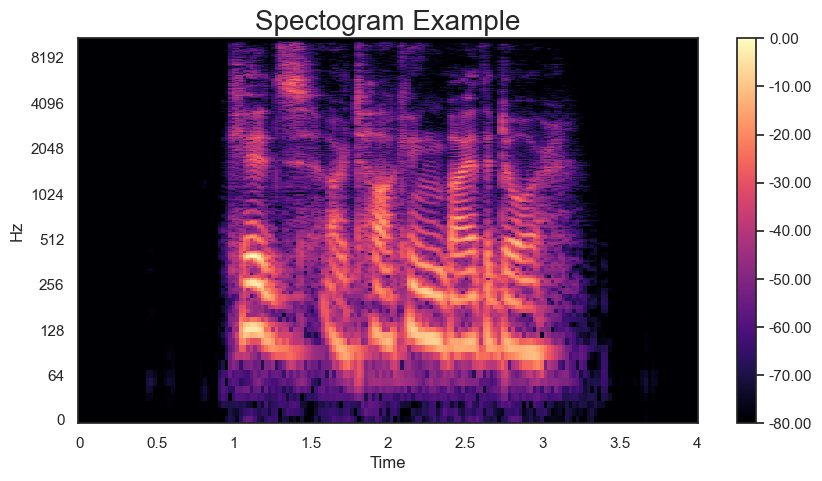

In [9]:
#Plot the transformed data
fig , ax = plt.subplots(figsize = (10,5)) # it return a figure and an array of axis
img = librosa.display.specshow(S_db,        # using librosa's display method to draw a spectogram
                              x_axis='time',
                              y_axis='log',
                               ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [10]:
'''Now, we are going to do a mel spectogram, mel spectogram is used to provide models 
with sound information, simular to what a human can perceive'''

S = librosa.feature.melspectrogram(y,   #applying mel spectogram
                                  sr=sr, # need to use sample rate of the audio
                                  n_mels=128,) # number of mels we want 

S_db_mel = librosa.amplitude_to_db(S,ref=np.max) #same as before

S_db_mel.shape

/tmp/ipykernel_7326/3502402790.py:4: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y,   #applying mel spectogram


(128, 173)

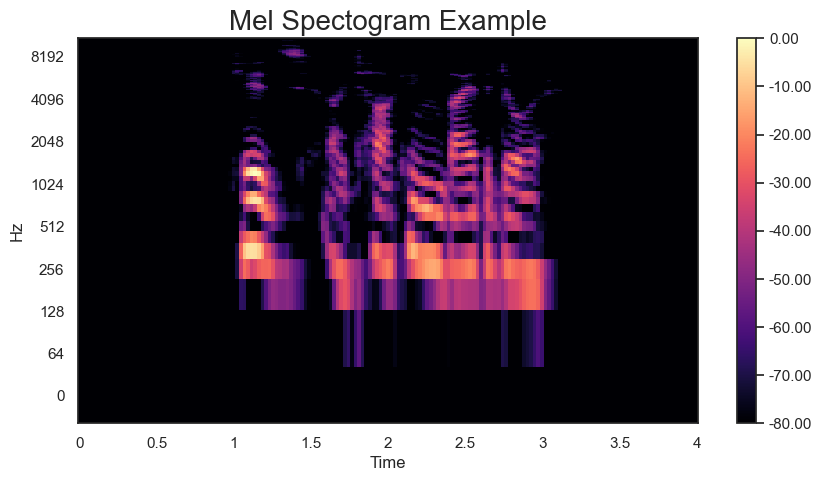

In [11]:
#Plot the  mel spectogram
fig , ax = plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_db_mel,         #using librosa's display method to draw a spectogram
                              x_axis='time',
                              y_axis='log',
                               ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()